# Data Cleaning, Feature Engineering, and Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Load the Dataset

In [2]:
file_path = "./data/gov/transactions_with_interest_final.csv"
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,כתובת,"מ""ר",תאריך עסקה,מחיר,גוש/חלקה/תת-חלקה,סוג נכס,חדרים,קומה,שנת בנייה,קומות במבנה,שכונה,ריבית בנק ישראל
0,חטיבת כרמלי 21,59.4,2025-04-06,"1,060,000 ₪",10920-100-27,דירה בבית קומות,3,רביעית,1960.0,5.0,נווה פז,0.0450
1,חטיבת כרמלי 21,59.4,2018-12-19,"600,000 ₪",10920-100-27,דירה בבית קומות,3,רביעית,1960.0,5.0,נווה פז,0.0025
2,יד לבנים 7,68,2025-04-01,"720,000 ₪",12485-15-6,דירה בבית קומות,3,לא ידוע,1940.0,3.0,נווה פז,0.0450
3,יד לבנים 37,44.8,2025-03-27,"645,000 ₪",12482-19-9,דירה בבית קומות,2,ראשונה,1960.0,3.0,נווה פז,0.0450
4,נווה גנים 4,54,2025-03-25,"1,120,000 ₪",10925-216-9,דירה בבית קומות,3,קומה 3,2015.0,8.0,נווה פז,0.0450


## Identify Missing Values

In [3]:
# Define custom missing value conditions
df['קומות במבנה'] = df['קומות במבנה'].replace(0, pd.NA)
df['שנת בנייה'] = df['שנת בנייה'].replace(0, pd.NA)
df['כתובת'] = df['כתובת'].replace('ללא כתובת', pd.NA)

# Count missing values per column
missing_counts = df.isna().sum()
missing_counts

כתובת               3167
מ"ר                    0
תאריך עסקה             0
מחיר                   0
גוש/חלקה/תת-חלקה       0
סוג נכס                0
חדרים                  0
קומה                   0
שנת בנייה           4122
קומות במבנה         5504
שכונה                  0
ריבית בנק ישראל       21
dtype: int64

### We are not treating missing values yet, but they are identified.

## Extract Year and Month from Transaction Date

In [4]:
# Convert 'תאריך עסקה' to datetime
df['תאריך עסקה'] = pd.to_datetime(df['תאריך עסקה'], errors='coerce')
df['שנת עסקה'] = df['תאריך עסקה'].dt.year
df['חודש עסקה'] = df['תאריך עסקה'].dt.month

# Drop original date column
df.drop(columns=['תאריך עסקה'], inplace=True)

df.head()

,כתובת,"מ""ר",מחיר,גוש/חלקה/תת-חלקה,סוג נכס,חדרים,קומה,שנת בנייה,קומות במבנה,שכונה,ריבית בנק ישראל,שנת עסקה,חודש עסקה
0,חטיבת כרמלי 21,59.4,"1,060,000 ₪",10920-100-27,דירה בבית קומות,3,רביעית,1960.0,5.0,נווה פז,0.0450,2025,4
1,חטיבת כרמלי 21,59.4,"600,000 ₪",10920-100-27,דירה בבית קומות,3,רביעית,1960.0,5.0,נווה פז,0.0025,2018,12
2,יד לבנים 7,68,"720,000 ₪",12485-15-6,דירה בבית קומות,3,לא ידוע,1940.0,3.0,נווה פז,0.0450,2025,4
3,יד לבנים 37,44.8,"645,000 ₪",12482-19-9,דירה בבית קומות,2,ראשונה,1960.0,3.0,נווה פז,0.0450,2025,3
4,נווה גנים 4,54,"1,120,000 ₪",10925-216-9,דירה בבית קומות,3,קומה 3,2015.0,8.0,נווה פז,0.0450,2025,3


## Split Address Column into Street and House Number

In [5]:
# Split address into street and house number
df[['רחוב', 'מספר בית']] = df['כתובת'].str.extract(r'(.+?)\s(\d+)$')
df.drop(columns=['כתובת'], inplace=True)
df.head()

,"מ""ר",מחיר,גוש/חלקה/תת-חלקה,סוג נכס,חדרים,קומה,שנת בנייה,קומות במבנה,שכונה,ריבית בנק ישראל,שנת עסקה,חודש עסקה,רחוב,מספר בית
0,59.4,"1,060,000 ₪",10920-100-27,דירה בבית קומות,3,רביעית,1960.0,5.0,נווה פז,0.0450,2025,4,חטיבת כרמלי,21
1,59.4,"600,000 ₪",10920-100-27,דירה בבית קומות,3,רביעית,1960.0,5.0,נווה פז,0.0025,2018,12,חטיבת כרמלי,21
2,68,"720,000 ₪",12485-15-6,דירה בבית קומות,3,לא ידוע,1940.0,3.0,נווה פז,0.0450,2025,4,יד לבנים,7
3,44.8,"645,000 ₪",12482-19-9,דירה בבית קומות,2,ראשונה,1960.0,3.0,נווה פז,0.0450,2025,3,יד לבנים,37
4,54,"1,120,000 ₪",10925-216-9,דירה בבית קומות,3,קומה 3,2015.0,8.0,נווה פז,0.0450,2025,3,נווה גנים,4


## Convert Floor Column to Numeric

In [6]:
floor_mapping = {
    'קרקע': 0, 'ראשונה': 1, 'שנייה': 2, 'שלישית': 3, 'רביעית': 4,
    'חמישית': 5, 'שישית': 6, 'שביעית': 7, 'שמינית': 8, 'תשיעית': 9,
    'עשירית': 10, 'אחת עשרה': 11, 'שתיים עשרה': 12, 'שלוש עשרה': 13,
    'ארבע עשרה': 14, 'חמש עשרה': 15, 'שש עשרה': 16, 'שבע עשרה': 17, 
    'שמונה עשרה': 18, 'תשע עשרה': 19, 'עשרים': 20
}
df['קומה'] = df['קומה'].map(floor_mapping)
df.head()

,"מ""ר",מחיר,גוש/חלקה/תת-חלקה,סוג נכס,חדרים,קומה,שנת בנייה,קומות במבנה,שכונה,ריבית בנק ישראל,שנת עסקה,חודש עסקה,רחוב,מספר בית
0,59.4,"1,060,000 ₪",10920-100-27,דירה בבית קומות,3,4.0,1960.0,5.0,נווה פז,0.0450,2025,4,חטיבת כרמלי,21
1,59.4,"600,000 ₪",10920-100-27,דירה בבית קומות,3,4.0,1960.0,5.0,נווה פז,0.0025,2018,12,חטיבת כרמלי,21
2,68,"720,000 ₪",12485-15-6,דירה בבית קומות,3,NaN,1940.0,3.0,נווה פז,0.0450,2025,4,יד לבנים,7
3,44.8,"645,000 ₪",12482-19-9,דירה בבית קומות,2,1.0,1960.0,3.0,נווה פז,0.0450,2025,3,יד לבנים,37
4,54,"1,120,000 ₪",10925-216-9,דירה בבית קומות,3,NaN,2015.0,8.0,נווה פז,0.0450,2025,3,נווה גנים,4


## Convert Property Type to Numeric

In [7]:
df['סוג נכס'] = df['סוג נכס'].astype('category').cat.codes
df.head()

,"מ""ר",מחיר,גוש/חלקה/תת-חלקה,סוג נכס,חדרים,קומה,שנת בנייה,קומות במבנה,שכונה,ריבית בנק ישראל,שנת עסקה,חודש עסקה,רחוב,מספר בית
0,59.4,"1,060,000 ₪",10920-100-27,6,3,4.0,1960.0,5.0,נווה פז,0.0450,2025,4,חטיבת כרמלי,21
1,59.4,"600,000 ₪",10920-100-27,6,3,4.0,1960.0,5.0,נווה פז,0.0025,2018,12,חטיבת כרמלי,21
2,68,"720,000 ₪",12485-15-6,6,3,NaN,1940.0,3.0,נווה פז,0.0450,2025,4,יד לבנים,7
3,44.8,"645,000 ₪",12482-19-9,6,2,1.0,1960.0,3.0,נווה פז,0.0450,2025,3,יד לבנים,37
4,54,"1,120,000 ₪",10925-216-9,6,3,NaN,2015.0,8.0,נווה פז,0.0450,2025,3,נווה גנים,4


## Convert Price to Numeric

In [8]:
df['מחיר'] = df['מחיר'].str.replace('[^\d]', '', regex=True).astype(float)
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\IMOE001\AppData\Local\Temp\ipykernel_16652\1309275127.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['מחיר'] = df['מחיר'].str.replace('[^\d]', '', regex=True).astype(float)


,"מ""ר",מחיר,גוש/חלקה/תת-חלקה,סוג נכס,חדרים,קומה,שנת בנייה,קומות במבנה,שכונה,ריבית בנק ישראל,שנת עסקה,חודש עסקה,רחוב,מספר בית
0,59.4,1060000.0,10920-100-27,6,3,4.0,1960.0,5.0,נווה פז,0.0450,2025,4,חטיבת כרמלי,21
1,59.4,600000.0,10920-100-27,6,3,4.0,1960.0,5.0,נווה פז,0.0025,2018,12,חטיבת כרמלי,21
2,68,720000.0,12485-15-6,6,3,NaN,1940.0,3.0,נווה פז,0.0450,2025,4,יד לבנים,7
3,44.8,645000.0,12482-19-9,6,2,1.0,1960.0,3.0,נווה פז,0.0450,2025,3,יד לבנים,37
4,54,1120000.0,10925-216-9,6,3,NaN,2015.0,8.0,נווה פז,0.0450,2025,3,נווה גנים,4


## Convert Neighborhood to Numeric

In [9]:
df['שכונה'] = df['שכונה'].astype('category').cat.codes
df.head()

,"מ""ר",מחיר,גוש/חלקה/תת-חלקה,סוג נכס,חדרים,קומה,שנת בנייה,קומות במבנה,שכונה,ריבית בנק ישראל,שנת עסקה,חודש עסקה,רחוב,מספר בית
0,59.4,1060000.0,10920-100-27,6,3,4.0,1960.0,5.0,15,0.0450,2025,4,חטיבת כרמלי,21
1,59.4,600000.0,10920-100-27,6,3,4.0,1960.0,5.0,15,0.0025,2018,12,חטיבת כרמלי,21
2,68,720000.0,12485-15-6,6,3,NaN,1940.0,3.0,15,0.0450,2025,4,יד לבנים,7
3,44.8,645000.0,12482-19-9,6,2,1.0,1960.0,3.0,15,0.0450,2025,3,יד לבנים,37
4,54,1120000.0,10925-216-9,6,3,NaN,2015.0,8.0,15,0.0450,2025,3,נווה גנים,4


## Split Data into Features (X) and Target (y)

In [10]:
# Define target and features
y = df['מחיר']
X = df.drop(columns=['מחיר'])

## Exploratory Data Analysis

In [11]:
# Basic stats
print("Features Info:")
print(X.info())

print("\nTarget Description:")
print(y.describe())

Features Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43634 entries, 0 to 43633
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   מ"ר               43634 non-null  object 
 1   גוש/חלקה/תת-חלקה  43634 non-null  object 
 2   סוג נכס           43634 non-null  int8   
 3   חדרים             43634 non-null  object 
 4   קומה              29177 non-null  float64
 5   שנת בנייה         39512 non-null  object 
 6   קומות במבנה       38130 non-null  object 
 7   שכונה             43634 non-null  int8   
 8   ריבית בנק ישראל   43613 non-null  float64
 9   שנת עסקה          43634 non-null  int32  
 10  חודש עסקה         43634 non-null  int32  
 11  רחוב              40467 non-null  object 
 12  מספר בית          40467 non-null  object 
dtypes: float64(2), int32(2), int8(2), object(7)
memory usage: 3.4+ MB
None

Target Description:
count    4.363400e+04
mean     1.191322e+06
std      2.256902e+06
min     

### Correlation between Features and Target

In [12]:
# Calculate correlations
correlations = pd.concat([X, y], axis=1).corr(numeric_only=True)['מחיר'].sort_values(ascending=False)
print(correlations)

מחיר               1.000000
סוג נכס            0.156044
שנת עסקה           0.133818
קומה               0.028047
חודש עסקה         -0.003629
ריבית בנק ישראל   -0.058303
שכונה             -0.061990
Name: מחיר, dtype: float64


### Visual Exploration of Top Correlated Features

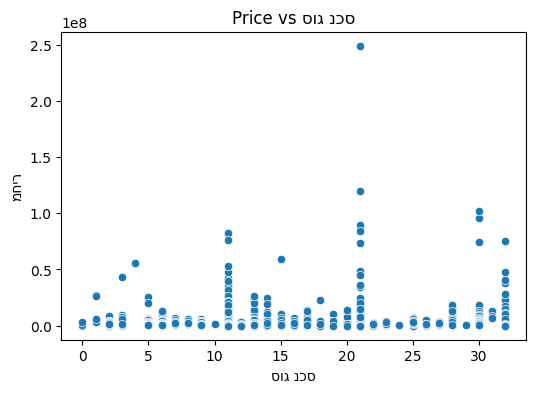

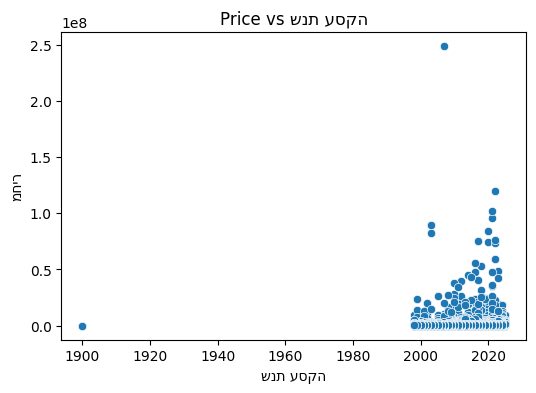

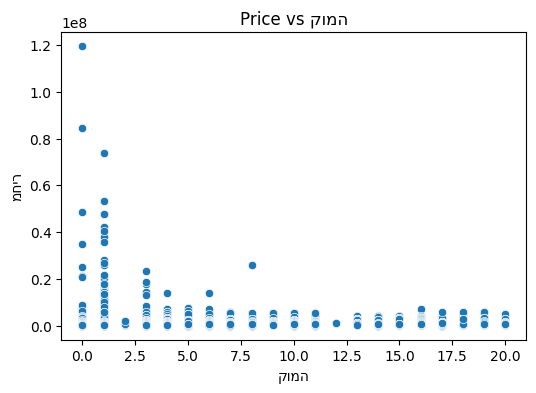

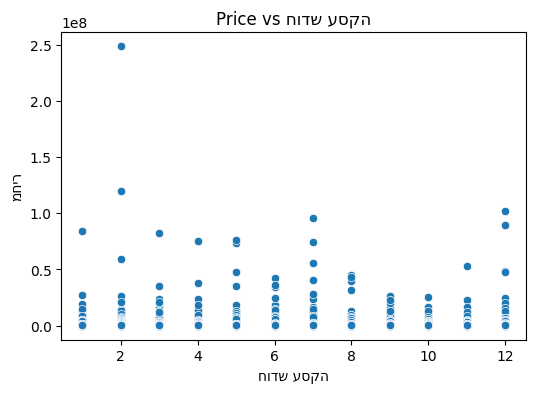

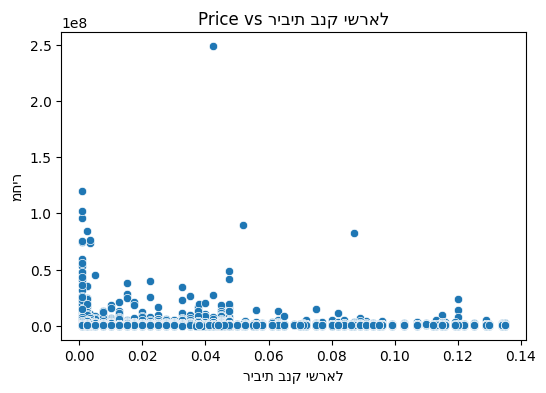

In [13]:
top_features = correlations.index[1:6]  # skip 'מחיר' itself

for feature in top_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=feature, y='מחיר', data=pd.concat([X, y], axis=1))
    plt.title(f"Price vs {feature}")
    plt.show()

## Outlier Detection and Handling

In [14]:
# Detect outliers in target using IQR
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print bounds
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

# Filter out outliers
mask = (y >= lower_bound) & (y <= upper_bound)
X_clean = X[mask]
y_clean = y[mask]

print(f"Removed {len(y) - len(y_clean)} outliers")

Lower bound: -787500.0, Upper bound: 2792500.0
Removed 1820 outliers


## Normalization of Features

In [15]:
# For simplicity we will normalize all numeric features except year/month which are ordinal
numeric_features = X_clean.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
X_scaled = X_clean.copy()
X_scaled[numeric_features] = scaler.fit_transform(X_clean[numeric_features])

X_scaled.head()

,"מ""ר",גוש/חלקה/תת-חלקה,סוג נכס,חדרים,קומה,שנת בנייה,קומות במבנה,שכונה,ריבית בנק ישראל,שנת עסקה,חודש עסקה,רחוב,מספר בית
0,59.4,10920-100-27,6,3,0.262550,1960.0,5.0,15,0.691177,2025,4,חטיבת כרמלי,21
1,59.4,10920-100-27,6,3,0.262550,1960.0,5.0,15,-0.754968,2018,12,חטיבת כרמלי,21
2,68,12485-15-6,6,3,NaN,1940.0,3.0,15,0.691177,2025,4,יד לבנים,7
3,44.8,12482-19-9,6,2,-0.723772,1960.0,3.0,15,0.691177,2025,3,יד לבנים,37
4,54,10925-216-9,6,3,NaN,2015.0,8.0,15,0.691177,2025,3,נווה גנים,4


## Train-Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_clean, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (33451, 13)
Test shape: (8363, 13)
